In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("C:/Users/LENOVO/Desktop/Main Project/dataset/default of credit card clients.xls")


In [4]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
###Exploratory Data Analysis

In [6]:
#1.Missing Data

In [7]:
import pandas as pd

# Assuming 'data' is a pandas DataFrame
missing_values = pd.isnull(data).sum().sum()
print(missing_values)


0


In [8]:
# 2.Calculating Descriptive Statistics using summary()


In [9]:
import pandas as pd

# Assuming 'data' is a pandas DataFrame
summary = data.describe()
print(summary)


        Unnamed: 0     X1     X2     X3     X4     X5     X6     X7     X8  \
count        30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique       30001     82      3      8      5     57     12     12     12   
top          25980  50000      2      2      2     29      0      0      0   
freq             1   3365  18112  14030  15964   1605  14737  15730  15764   

           X9  ...    X15    X16    X17    X18    X19    X20    X21    X22  \
count   30001  ...  30001  30001  30001  30001  30001  30001  30001  30001   
unique     12  ...  21549  21011  20605   7944   7900   7519   6938   6898   
top         0  ...      0      0      0      0      0      0      0      0   
freq    16455  ...   3195   3506   4020   5249   5396   5968   6408   6703   

          X23      Y  
count   30001  30001  
unique   6940      3  
top         0      0  
freq     7173  23364  

[4 rows x 25 columns]


In [10]:
#DRop a column
data=data.drop('Unnamed: 0',axis=1)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [11]:
data.shape

(30001, 24)

In [12]:
import pandas as pd

# Assuming 'data' is a pandas DataFrame
index_to_delete = 0  # Index of the row to be deleted
modified_data = data.drop(index_to_delete)
data.drop(index_to_delete, inplace=True)


In [13]:
#Mean of age taken to study
import pandas as pd
# Assuming 'data' is a pandas DataFrame and 'X5' is a column name
a = data['X5'].median()
print(a)


34.0


In [14]:
data['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

In [15]:
outlier=['X1','X5','X3']

D:\study\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


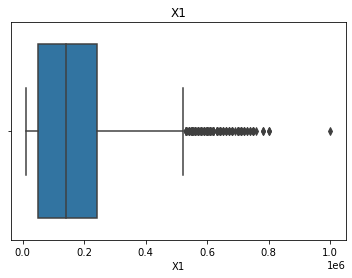

D:\study\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


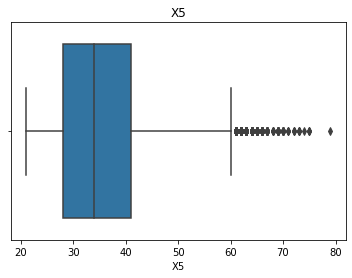

D:\study\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


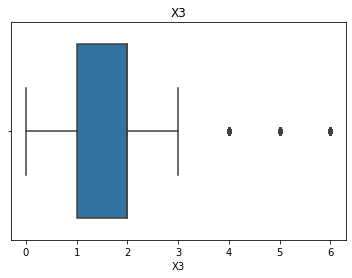

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for x in outlier:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [20]:
import pandas as pd
import numpy as np



# Remove outliers using the IQR method
for column in outlier:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    data = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# The outliers have been removed from the specified columns

# Further preprocessing or analysis can be performed on the cleaned data


In [21]:
#CODE OF SUPPORT VECTOR MACHINE

D:\study\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


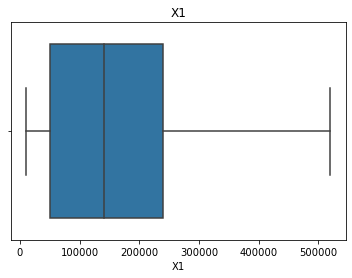

D:\study\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


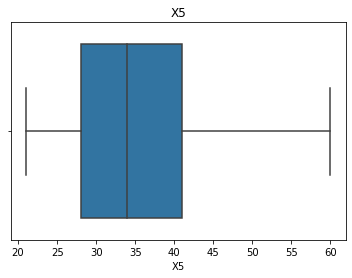

D:\study\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


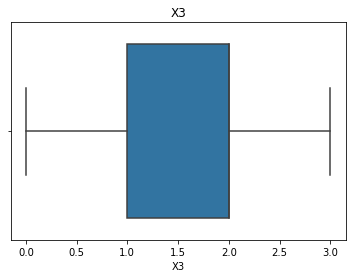

In [22]:
for x in outlier:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = data.drop('Y', axis=1)
y = data['Y']

In [24]:
print(y.dtypes)

object


In [25]:
print(y.unique())

[1 0]


In [26]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Create an SVM classifier
svm = SVC(kernel='linear', random_state=42)

In [29]:
# Train the classifier
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [30]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8116414835164835


In [32]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4545
           1       0.70      0.25      0.37      1279

    accuracy                           0.81      5824
   macro avg       0.76      0.61      0.63      5824
weighted avg       0.79      0.81      0.77      5824

